# Milestone 2 : Final Analysis 




## **1. Introduction**

## **2. Data description**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling





df= (pd.read_csv('AirQualityUCI.csv')
     .drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','Unnamed: 15','Unnamed: 16','RH','AH'])     
     .dropna()
     .rename(columns={"NMHC(GT)": "Nonmethane Hydrocarbons", "C6H6(GT)": "Benzene", "NOx(GT)": "Nitrogen Oxides", "NO2(GT)": "Nitrogen Dioxide"})
    )

df.drop(df.index[df['CO(GT)'] == -200], inplace = True)
df.drop(df.index[df['Nonmethane Hydrocarbons'] == -200], inplace = True)
df.drop(df.index[df['Benzene'] == -200], inplace = True)
df.drop(df.index[df['Nitrogen Oxides'] == -200], inplace = True)
df.drop(df.index[df['Nitrogen Dioxide'] == -200], inplace = True)
df.drop(df.index[df['T'] == -200], inplace = True)

df.head()

,Date,Time,CO(GT),Nonmethane Hydrocarbons,Benzene,Nitrogen Oxides,Nitrogen Dioxide,T
0,2004-03-10,18:00:00,2.6,150.0,11.9,166.0,113.0,13.6
1,2004-03-10,19:00:00,2.0,112.0,9.4,103.0,92.0,13.3
2,2004-03-10,20:00:00,2.2,88.0,9.0,131.0,114.0,11.9
3,2004-03-10,21:00:00,2.2,80.0,9.2,172.0,122.0,11.0
4,2004-03-10,22:00:00,1.6,51.0,6.5,131.0,116.0,11.2


## description：
From TA's comments:

You need to add a section called dataset, and explain the data. What are the columns and what do they show?

## **3. EDA**

### 3.1.1 CO(GT) with Temperatures Plots

Text(27.0, 0.5, 'CO(GT) (PPM)')

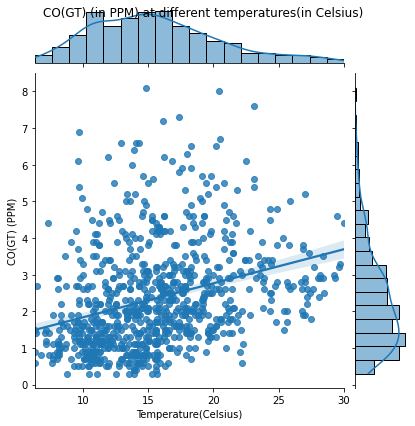

In [109]:
#Jointplot
co = sns.jointplot(x='T', y='CO(GT)', data=df, kind='reg')
co.fig.suptitle("CO(GT) (in PPM) at different temperatures(in Celsius)")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("CO(GT) (PPM)")

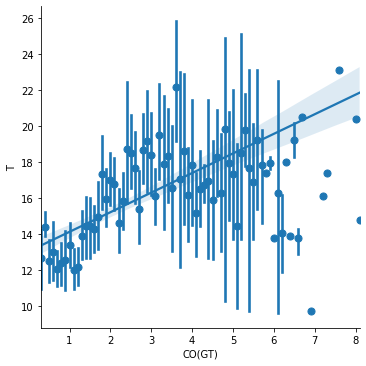

In [110]:
sns.lmplot(x="CO(GT)", y="T",  data=df, x_estimator=np.mean)

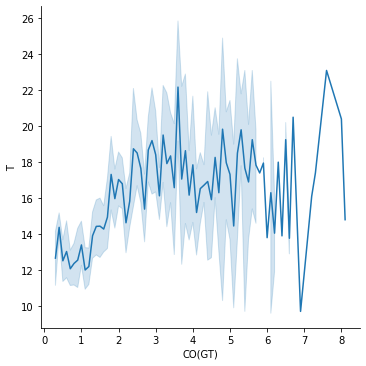

In [111]:
 sns.relplot(x="CO(GT)", y="T", kind="line", data=df)

### 3.1.2 CO(GT) Analysis

First, we want to find the relationship between CO emission and temperature, after using scatter plot between CO emission and temperature. We can predict that that lower temperature likely result in lower CO emission. 

### 3.2.1 Nonmethane Hydrocarbons with Temperatures Plots

Text(27.0, 0.5, 'Nonmethane Hydrocarbons (PPM)')

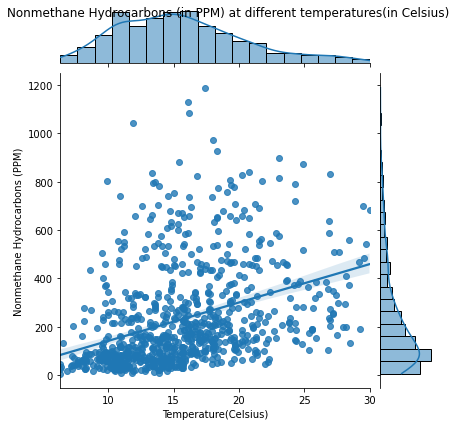

In [112]:
nh = sns.jointplot(x='T', y='Nonmethane Hydrocarbons', data=df, kind='reg')
nh.fig.suptitle("Nonmethane Hydrocarbons (in PPM) at different temperatures(in Celsius)")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nonmethane Hydrocarbons (PPM)")

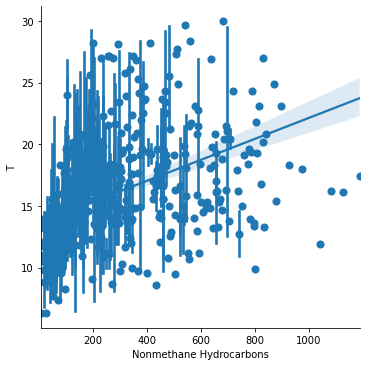

In [113]:
sns.lmplot(x="Nonmethane Hydrocarbons", y="T", data=df, x_estimator=np.mean)

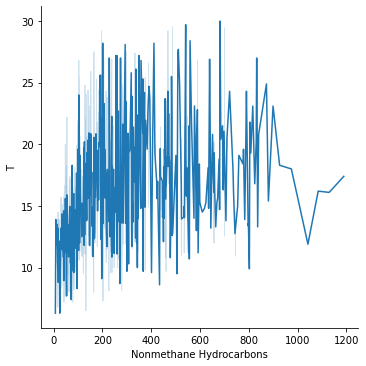

In [114]:
sns.relplot(x="Nonmethane Hydrocarbons", y="T",kind="line", data=df)

### 3.2.2 Nonmethane Hydrocarbons Analysis

Now we attempt to find the relationship between Nonmethane Hydrocarbons and temperature, based on the scatter line, temperature does not seems to have significant impact on Nonmethane Hydrocarbons emision.

### 3.3.1 Benzene with Temperatures Plots

Text(27.0, 0.5, 'Benzene (PPM)')

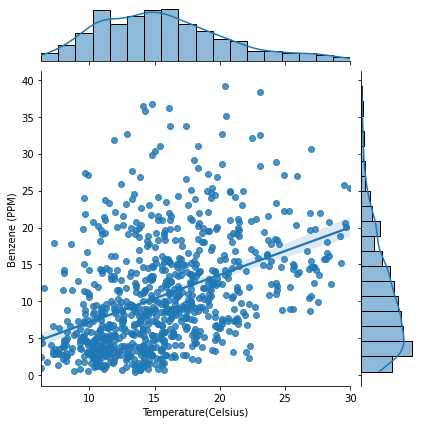

In [115]:
b = sns.jointplot(x='T', y='Benzene', data=df, kind='reg')
nh.fig.suptitle("Benzenes (in PPM) at different temperatures(in Celsius)")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Benzene (PPM)")

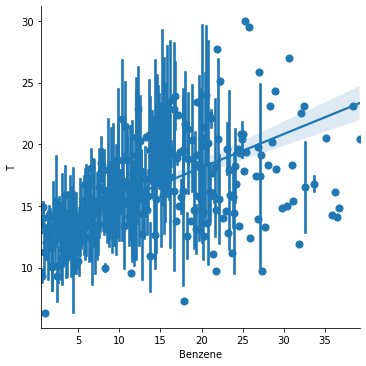

In [116]:
sns.lmplot(x="Benzene", y="T", data=df, x_estimator=np.mean) 

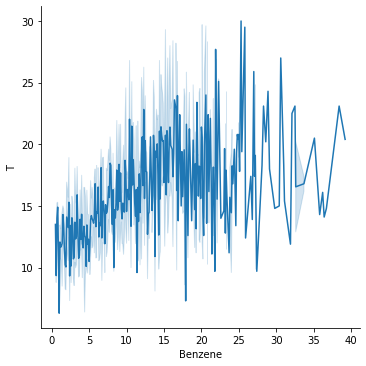

In [117]:
sns.relplot(x="Benzene", y="T", kind="line", data=df)

### 3.3.2 Benzene Analysis

Looking at the figure above, clearly temperature has a significant impact on Benzene emission, based on the data in the dataset, it seems that emission of benzene is high at high temperature.  

### 3.4.1 Nitrogen Oxides with Temperatures Plots

Text(27.0, 0.5, 'Nitrogen Oxides (PPM)')

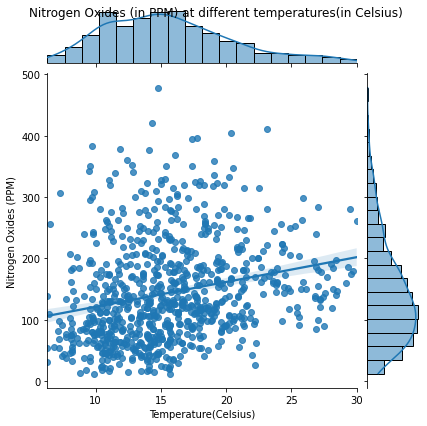

In [118]:
no = sns.jointplot(x='T', y='Nitrogen Oxides', data=df, kind='reg')
no.fig.suptitle("Nitrogen Oxides (in PPM) at different temperatures(in Celsius)")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nitrogen Oxides (PPM)")

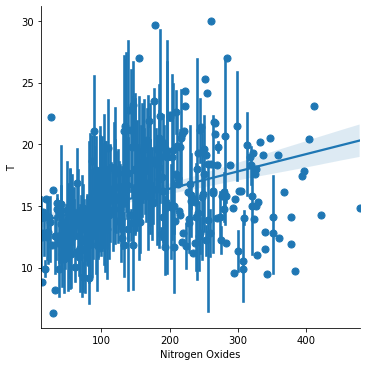

In [119]:
sns.lmplot(x="Nitrogen Oxides", y="T", data=df, x_estimator=np.mean)

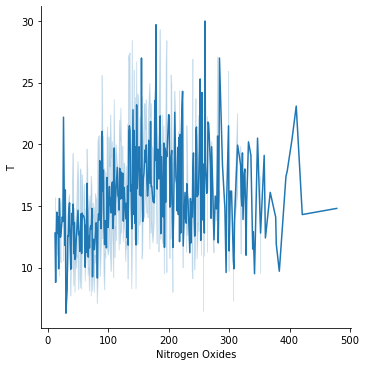

In [120]:
sns.relplot(x="Nitrogen Oxides", y="T",kind="line", data=df)

### 3.4.2 Nitrogen Oxides Analysis

Figure above shows the relationship between Nitrogen Oxide (N0x) and temperature, similar to carbon monoxide, it seems higher temperature result in lower emission.

### 3.3.1 Nitrogen Dioxide with Temperatures Plots

Text(27.0, 0.5, 'Nitrogen Dioxide (PPM)')

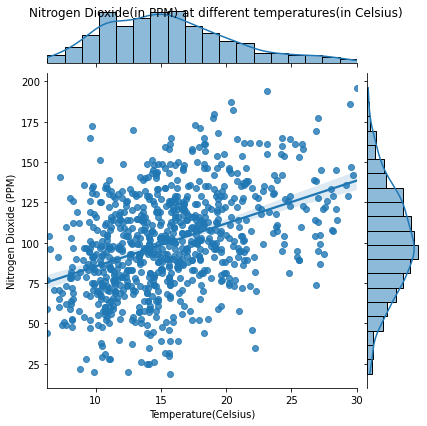

In [121]:
nd = sns.jointplot(x='T', y='Nitrogen Dioxide', data=df, kind='reg')
nd.fig.suptitle("Nitrogen Dioxide(in PPM) at different temperatures(in Celsius)")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Nitrogen Dioxide (PPM)")

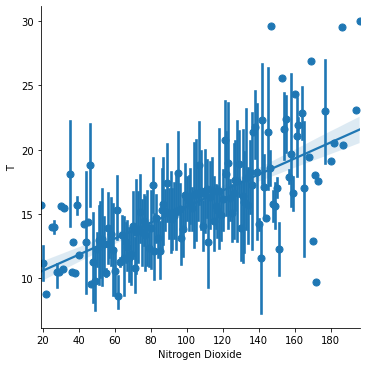

In [122]:
sns.lmplot(x="Nitrogen Dioxide", y="T", data=df, x_estimator=np.mean)

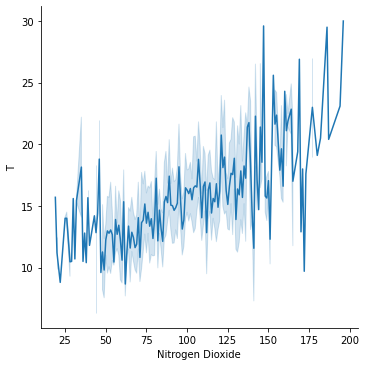

In [123]:
sns.relplot(x="Nitrogen Dioxide", y="T",kind="line", data=df)

### 3.5.2 Nitrogen Dioxide Analysis

As we expected, Nitrogen Monoxide (NO) emission behaves similar with Nitro oxides (NOx), where emission is lowered when temperature is low.

### 3.6 summary graph？？？

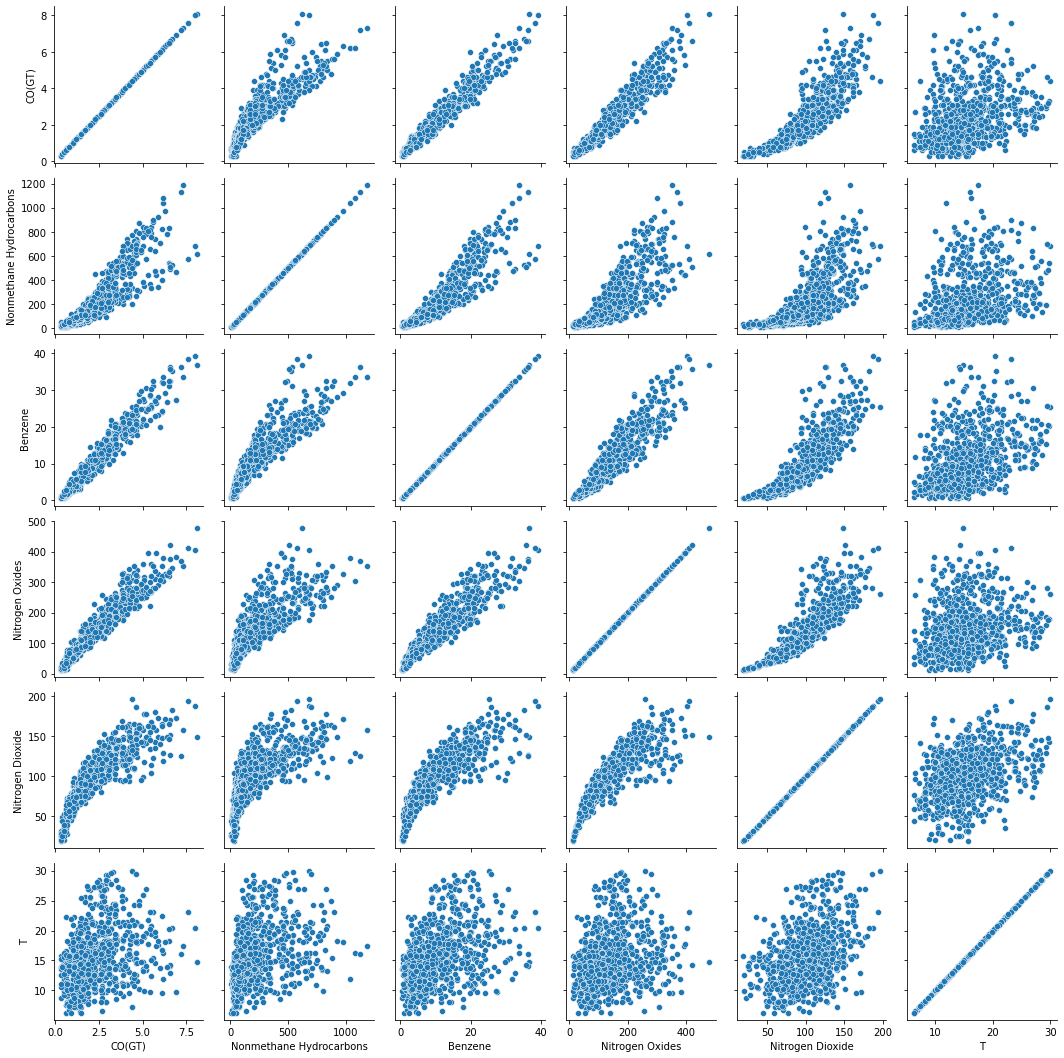

In [124]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

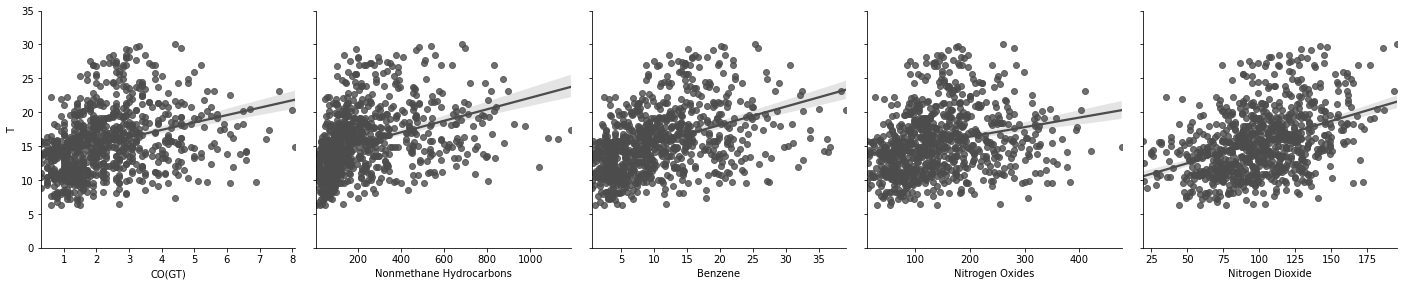

In [125]:
g = sns.PairGrid(df, y_vars=["T"], x_vars=["CO(GT)", "Nonmethane Hydrocarbons","Benzene","Nitrogen Oxides","Nitrogen Dioxide"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(0, 35))

## **4. Research Questions**

After creating our own EDA and discussion, we decided to modify our research question to:  
### **How does temperature affect the emission of various pollutants?**  
  
Our original research question was to determine the relationship between times of the year (Date) and the emission of various polltans. However, after discussion we decided that a more direct relationship exist between temperature and emission, as date is influence emission of various pollutants by changing temperature. 


## **5. Results**

## From TA's comments:
Add a section called analysis, and explain why exactly you chose that specific method of analysis to answer your questions. Why do you think that method of visualization would help you to answer the questions.

## **6. Conclusion**

Before various relationship between temperature and pollutants are made, me and our group assumed that temperature likely will all them in the same manner. However, based on the dataset that seesm to be false. As clearly, each pollutant is affected differently by temperature.  


Our second thought was to combine all of the pollutants and plot it against temperature. However, given that each type of pollutant have different levels of emmission, totaling them together will not result in accurate data. 
  
Therefore, in regard to our research question of **How does temperature affect the emission of various pollutants?** based on the dataset we have, our answer is:  
  
- CO decrease as temperature increases.
- Nonmethane Hydrocarbons does not seems to be affect by temperature.
- Benzene drastically increase in emission as temperature increase. 
- Nitrogen oxides and dioxides both decrease emission at higher temperature
